In [6]:
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline


/home/ilker/.local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


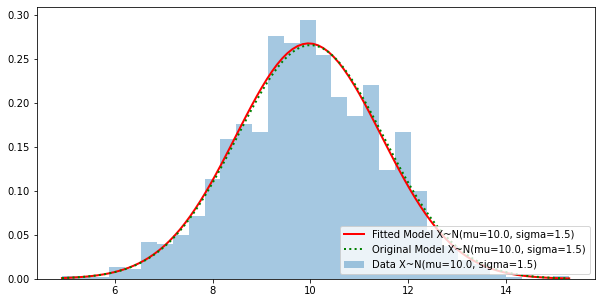

/home/ilker/.local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


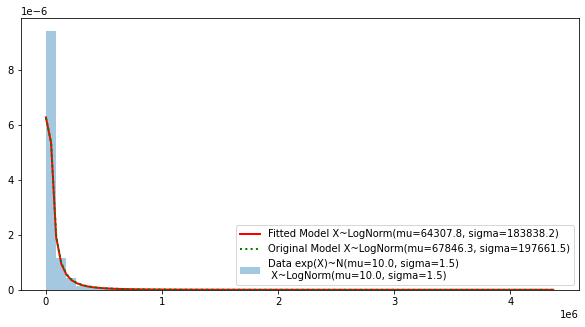

In [9]:


mu = 10 # Mean of sample !!! Make sure your data is positive for the lognormal example 
sigma = 1.5 # Standard deviation of sample
N = 2000 # Number of samples

norm_dist = scipy.stats.norm(loc=mu, scale=sigma) # Create Random Process
x = norm_dist.rvs(size=N) # Generate samples

# Fit normal
fitting_params = scipy.stats.norm.fit(x)
norm_dist_fitted = scipy.stats.norm(*fitting_params)
t = np.linspace(np.min(x), np.max(x), 100)

# Plot normals
f, ax = plt.subplots(1, sharex='col', figsize=(10, 5))
sns.distplot(x, ax=ax, norm_hist=True, kde=False, label='Data X~N(mu={0:.1f}, sigma={1:.1f})'.format(mu, sigma))
ax.plot(t, norm_dist_fitted.pdf(t), lw=2, color='r',
        label='Fitted Model X~N(mu={0:.1f}, sigma={1:.1f})'.format(norm_dist_fitted.mean(), norm_dist_fitted.std()))
ax.plot(t, norm_dist.pdf(t), lw=2, color='g', ls=':',
        label='Original Model X~N(mu={0:.1f}, sigma={1:.1f})'.format(norm_dist.mean(), norm_dist.std()))
ax.legend(loc='lower right')
plt.show()


# The lognormal model fits to a variable whose log is normal
# We create our variable whose log is normal 'exponenciating' the previous variable

x_exp = np.exp(x)
mu_exp = np.exp(mu)
sigma_exp = np.exp(sigma)

fitting_params_lognormal = scipy.stats.lognorm.fit(x_exp, floc=0, scale=mu_exp)
lognorm_dist_fitted = scipy.stats.lognorm(*fitting_params_lognormal)
t = np.linspace(np.min(x_exp), np.max(x_exp), 100)

# Here is the magic I was looking for a long long time
lognorm_dist = scipy.stats.lognorm(s=sigma, loc=0, scale=np.exp(mu))
# Plot lognormals
f, ax = plt.subplots(1, sharex='col', figsize=(10, 5))
sns.distplot(x_exp, ax=ax, norm_hist=True, kde=False,
             label='Data exp(X)~N(mu={0:.1f}, sigma={1:.1f})\n X~LogNorm(mu={0:.1f}, sigma={1:.1f})'.format(mu, sigma))
ax.plot(t, lognorm_dist_fitted.pdf(t), lw=2, color='r',
        label='Fitted Model X~LogNorm(mu={0:.1f}, sigma={1:.1f})'.format(lognorm_dist_fitted.mean(), lognorm_dist_fitted.std()))
ax.plot(t, lognorm_dist.pdf(t), lw=2, color='g', ls=':',
        label='Original Model X~LogNorm(mu={0:.1f}, sigma={1:.1f})'.format(lognorm_dist.mean(), lognorm_dist.std()))
ax.legend(loc='lower right')
plt.show()